In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
plt.style.use("seaborn")

### Data set loading

In [2]:
def load_csv(filename):
    file = open(filename, "r", encoding="utf-8")
    experiments = []
    headers = []
    reader = csv.reader(file)
    for i, lines in enumerate(reader):
        if i == 0:
            #headers = [e for e in lines[0].split(";")]
            h = lines[0].split(";")
            headers.append(h)
        else:
            tmp = lines[0].split(";")
            for j in range(0,len(tmp)):
                if (j != 0 and j != 1879):
                    tmp[j] = float(tmp[j])
                else:
                    continue
            #tmp = [float(tmp[j]) for j in range(0,len(tmp)) if (j!=0 and j!=1879)] #This removes two entries, dunno why. 
            experiments.append(tmp)
    file.close()
    return headers, experiments

In [3]:
headers, experiments =load_csv('/home/jovyan/covid-data/dalia_MeanFeaturesPerWell_BatchA.csv')

In [4]:
print(f'Number of experiments in MeanFeaturesPerWell_BatchA: {len(experiments)}') #Experiments in batch A
print(f'Number of columns in MeanFeaturesPerWell_BatchA: {len(experiments[0])}') #Columns

Number of experiments in MeanFeaturesPerWell_BatchA: 6065
Number of columns in MeanFeaturesPerWell_BatchA: 1883


In [39]:
headers[0][-5:]

['RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm',
 'CompoundID',
 'principal component 1',
 'Ypredicted',
 'Intensity_MeanIntensity_illumMITO_cells']

### Principal component analysis: extract information

In [5]:
pca_info_headers = [headers[i][1879:] for i in range(0,len(headers))]
print(pca_info_headers)
pca_info_data = [experiments[i][1879:] for i in range(0,len(experiments))]
print(pca_info_data[0:3])

[['CompoundID', 'principal component 1', 'Ypredicted', 'Intensity_MeanIntensity_illumMITO_cells']]
[['Uninfected', -76.28908581, 0.920807383, 0.00620536], ['Uninfected', -78.55454195, 0.947901377, 0.006723618], ['Uninfected', -77.12240959, 0.954720873, 0.005685419]]


### Intensity_MeanIntensity_illumMITO_cells heatmap replication

In [7]:
def filter_plate(plate_prefix,data):
    plate = []
    for i in range(0, len(data)):
        if data[i][0].startswith(plate_prefix):
            plate.append(data[i])
    return plate

In [8]:
plate_SS_001A_2 = filter_plate('001A',experiments)
#print(len(plate_001A)) #make sure that no data is missing
#print(len(plate_001A[0]) )#make sure that no data is missing

In [9]:
df = pd.DataFrame(plate_SS_001A_2)
sorted_df = df.sort_values(by=0)
sorted_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882
120,001AA01CBK308182,228.777778,1614.916622,2199.134236,1102.890412,1063.082895,1057.066693,1016.987809,1079.465245,1039.543836,...,0.002409,-0.046301,-0.013040,0.017562,0.012498,0.017867,CBK308182,25.152096,-0.133303,0.010099
16,001AA02Remdesivir,217.250000,1770.333452,2391.411152,1051.711796,1070.592800,1003.593429,1022.573939,1027.137118,1046.067247,...,-0.000864,-0.041331,0.014762,0.086851,-0.059788,0.050948,Remdesivir,-13.129294,0.275418,0.008136
79,001AA03CBK308286,191.222222,1557.802832,2152.585685,1068.228289,1101.173731,1022.863700,1055.871469,1045.042914,1078.039492,...,0.023625,-0.020756,0.049393,-0.064910,-0.041902,-0.089263,CBK308286,55.809578,-0.455838,0.011939
369,001AA04CBK012489,205.222222,1610.127813,2218.952175,1146.680380,1123.958180,1100.694740,1078.049096,1123.153195,1100.505270,...,-0.019865,0.014770,-0.015796,0.020290,-0.052188,-0.032901,CBK012489,45.827214,-0.351170,0.011563
132,001AA05CBK308023,239.222222,1622.088687,2199.723043,1137.045166,1094.393006,1091.051555,1048.169962,1113.528163,1070.769271,...,0.033518,-0.036066,0.025845,-0.074844,-0.003827,-0.018231,CBK308023,17.903463,-0.048292,0.009648


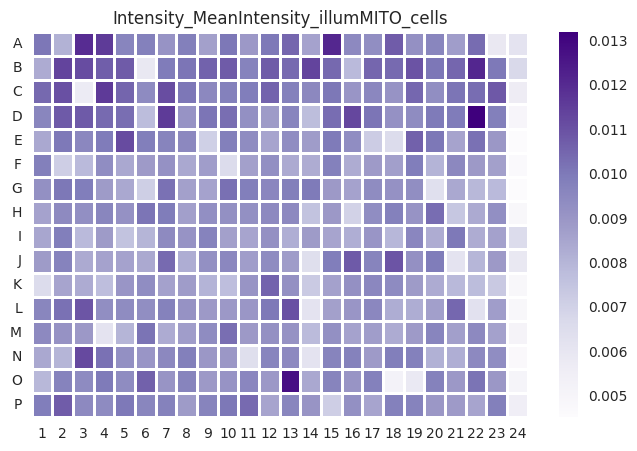

In [54]:
alphabet = [chr(i) for i in range(ord('A'),ord('P')+1)] 
Intensity_MeanIntensity_illumMITO_cells = sorted_df[sorted_df.columns[-1]].to_numpy().reshape(16, 24)
df_cm = pd.DataFrame(Intensity_MeanIntensity_illumMITO_cells, index = alphabet,
                  columns = np.arange(1,25))
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, cmap = 'Purples', linewidth = 1, annot=False)
plt.yticks(rotation=0)
plt.title('Intensity_MeanIntensity_illumMITO_cells')
plt.savefig('heatmap_Intensity_MeanIntensity_illumMITO_cells.png')
plt.show()